In [1]:
import pyscf

In [2]:
molecule = """
Cr -1.32078 0.00005 -0.00007
Cr 1.32077 0.00005 -0.00007
O 0.00000 -0.16583 1.45468
O 0.00000 1.34277 -0.58372
O 0.00000 -1.17683 -0.87101
H 0.00002 0.50128 2.15993
H 0.00056 1.61869 -1.51448
H -0.00044 -2.12079 -0.64413
N -2.64980 -1.44569 0.71142
H -2.18696 -2.18198 1.24440
H -3.05396 -1.84420 -0.13607
H -3.36727 -1.00512 1.28721
N -2.64980 1.33902 0.89630
N -2.64980 0.10677 -1.60777
H -3.36727 -0.61216 -1.51411
H -3.05396 0.80432 1.66516
N 2.64980 -1.44568 0.71142
N 2.64979 1.33903 0.89630
N 2.64980 0.10678 -1.60777
H -2.18697 2.16873 1.26745
H -3.36727 1.61737 0.22686
H -2.18696 0.01334 -2.51190
H -3.05397 1.03998 -1.52914
H 2.18696 -2.18197 1.24440
H 3.05396 -1.84419 -0.13608
H 3.36727 -1.00510 1.28720
H 2.18695 2.16874 1.26745
H 3.05396 0.80433 1.66516
H 3.36726 1.61738 0.22685
H 2.18696 0.01335 -2.51190
H 3.05396 1.03999 -1.52914
H 3.36727 -0.61215 -1.51411
"""

In [3]:
basis = "def2-svp"
pymol = pyscf.gto.Mole(
        atom    =   molecule,
        symmetry=   True,
        spin    =   6,
        charge  =   3,
        basis   =   basis)


pymol.build()
print("symmetry: ",pymol.topgroup)
# mf = pyscf.scf.UHF(pymol).x2c()
mf = pyscf.scf.UHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.chkfile = "scf.fchk"
mf.init_guess = "sad"
mf.run(max_cycle=200)

print(" Hartree-Fock Energy: %12.8f" % mf.e_tot)
mf.analyze()

symmetry:  C1


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = sad
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = scf.fchk
max_memory 4000 MB (current use 0 MB)
number electrons alpha = 69  beta = 63
init E= -2649.46926360849
  alpha nocc = 69  HOMO = -0.192719824232851  LUMO = -0.0859499418977073
  beta  nocc = 63  HOMO = -0.421412627918554  LUMO = -0.249613047821689

WARN: system HOMO -0.192719824232851 >= system LUMO -0.249613047821689

cycle= 1 E= -2648.33372169409  delta_E= 1.14  |g|= 0.855  |ddm|= 3.97
  alpha nocc = 69  HOMO = -0.752657798384382  LUMO = -0.296731583109594
  beta  nocc = 63  HOMO = -0.745246113405333  LUMO = -0.296027302036964
cycle= 2 E= -2648.73839536576  delta_E= -0.405  |g|= 0.483  |ddm|= 1.11
  alpha nocc = 69  HOMO = -0.899469

(((array([9.99999122e-01, 9.99996431e-01, 9.99805822e-01, 2.18630606e-01,
          2.25874459e-03, 9.99991977e-01, 9.99995407e-01, 9.99995406e-01,
          9.99010590e-01, 9.99211388e-01, 9.99211371e-01, 7.83269401e-03,
          9.69573181e-03, 9.69708810e-03, 4.51875775e-01, 7.64424987e-01,
          8.19665378e-01, 4.51860722e-01, 9.30210476e-01, 5.33734578e-03,
          1.17059807e-02, 1.19426595e-02, 5.33710388e-03, 1.24192690e-02,
          1.52367671e-04, 4.32811249e-04, 3.60561448e-05, 1.74042937e-04,
          3.71820179e-04, 1.68650132e-04, 3.31129868e-04, 9.99999122e-01,
          9.99996431e-01, 9.99805822e-01, 2.18630191e-01, 2.25873775e-03,
          9.99991977e-01, 9.99995407e-01, 9.99995406e-01, 9.99010598e-01,
          9.99211384e-01, 9.99211386e-01, 7.83273513e-03, 9.69667626e-03,
          9.69631645e-03, 4.51852937e-01, 7.64450466e-01, 8.19645000e-01,
          4.51883720e-01, 9.30208641e-01, 5.33711839e-03, 1.17061269e-02,
          1.19417845e-02, 5.33729970e-

In [5]:
import numpy as np
dm1 = mf.make_rdm1();
np.save("uhf_mo_coeffs_a", mf.mo_coeff[0])
np.save("uhf_mo_coeffs_b", mf.mo_coeff[1])
np.save("uhf_density", dm1)

(69, 63)
 Number of active orbitals:  46
 Number of doc    orbitals:  43


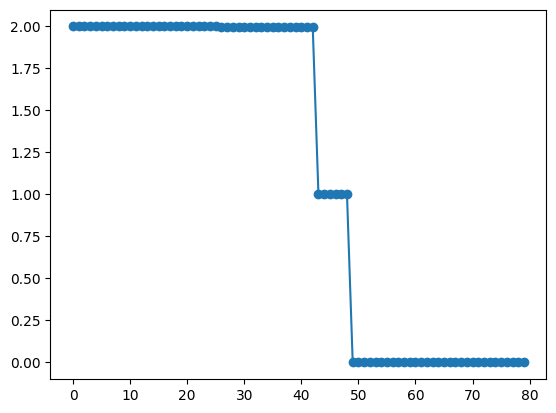

In [91]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from matplotlib import pyplot as plt


Ca = mf.mo_coeff[0]
Cb = mf.mo_coeff[1]
S = mf.get_ovlp()
na1 = mf.nelec[0]
nb1 = mf.nelec[1]
print(mf.nelec)

Ca_doc = Ca[:,0:na1]
Cb_doc = Cb[:,0:nb1]
Pa = Ca_doc @ Ca_doc.T
Pb = Cb_doc @ Cb_doc.T

P = Pa + Pb

sqrtS = sp.linalg.sqrtm(S)
P = sqrtS @ P @ sqrtS
P = (P + P.T) * .5
# F = sp.linalg.eig(P);
P_evals, P_evecs = sp.linalg.eigh(P)
perm = np.argsort(P_evals)[::-1]
P_evals = P_evals[perm]
P_evecs = P_evecs[:,perm]

# print("S^2", mf.spin_square((Ca_doc,Cb_doc),S))
act_list = []
doc_list = []

thresh = .0001
for idx,n in enumerate(P_evals):
#     @printf(" %4i = %12.8f\n",idx,n)
    if n < 2.0 - thresh:
        if n > thresh:
            act_list.append(idx)
    else:
        doc_list.append(idx)
        
        
print(" Number of active orbitals: ", len(act_list))
print(" Number of doc    orbitals: ", len(doc_list))

invsqrtS = sp.linalg.inv(sqrtS)

Cact = invsqrtS @ P_evecs[:,act_list]
Cdoc = invsqrtS @ P_evecs[:,doc_list]


pyscf.tools.molden.from_mo(pymol, "C_act.molden", Cact)
pyscf.tools.molden.from_mo(pymol, "C_doc.molden", Cdoc)

# import matplotlib as mpl

# plt.plot(sorted(P_evals)[420:470], marker="o")
plt.plot(P_evals[20:100], marker="o")

In [92]:
Cact_loc = pyscf.lo.PM(pymol).kernel(Cact, verbose=4);
pyscf.tools.molden.from_mo(pymol, "C_act_loc.molden", Cact_loc)


Set conv_tol_grad to 0.000316228
macro= 1  f(x)= 18.443140127321  delta_f= 18.4431  |g|= 1.9419  4 KF 20 Hx
macro= 2  f(x)= 22.87306356356  delta_f= 4.42992  |g|= 2.30749  4 KF 20 Hx
macro= 3  f(x)= 28.805621262499  delta_f= 5.93256  |g|= 2.37051  4 KF 20 Hx
macro= 4  f(x)= 33.29100496144  delta_f= 4.48538  |g|= 2.22678  4 KF 20 Hx
macro= 5  f(x)= 35.157292757693  delta_f= 1.86629  |g|= 2.08657  3 KF 20 Hx
macro= 6  f(x)= 37.227969640907  delta_f= 2.07068  |g|= 1.02627  4 KF 20 Hx
macro= 7  f(x)= 37.848892638234  delta_f= 0.620923  |g|= 0.342235  4 KF 22 Hx
macro= 8  f(x)= 37.941515348427  delta_f= 0.0926227  |g|= 0.0898384  4 KF 24 Hx
macro= 9  f(x)= 37.955226005701  delta_f= 0.0137107  |g|= 0.00682435  5 KF 29 Hx
macro= 10  f(x)= 37.955371838593  delta_f= 0.000145833  |g|= 0.00222135  5 KF 32 Hx
macro= 11  f(x)= 37.955409215637  delta_f= 3.7377e-05  |g|= 0.000420851  6 KF 35 Hx
macro= 12  f(x)= 37.955414500001  delta_f= 5.28436e-06  |g|= 0.000390603  1 KF 5 Hx
macro= 13  f(x)= 37.955

In [53]:
# # clustering from average positions
# print(np.trace(Cact_loc.T @ S @ Cact_loc))
# r1 = pymol.intor_symmetric("int1e_r");
# r2 = pymol.intor_symmetric("int1e_r2");

# rx = (Cact_loc.T @ r1[0,:,:] @ Cact_loc).diagonal();
# ry = (Cact_loc.T @ r1[1,:,:] @ Cact_loc).diagonal();
# rz = (Cact_loc.T @ r1[2,:,:] @ Cact_loc).diagonal();
# n_act = Cact_loc.shape[1]
# positions = np.zeros((n_act,3))
# positions[:,0] = rx
# positions[:,1] = ry
# positions[:,2] = rz
# xyz_str = "{n_act}\n\n".format(n_act = n_act)
# for i in range(n_act):
#     xyz_str += "H {x} {y} {z}\n".format(x=positions[i,0], y=positions[i,1], z=positions[i,2])
    
# # print(xyz_str)

# metric = np.zeros((n_act, n_act))

# for i in range(n_act):
#     for j in range(i+1,n_act):
#         pi = positions[i,:]
#         pj = positions[j,:]
#         # vari = r2[i,i] - r1[i,i]*r1[i,i]
#         # varj = r2[j,j] - position]*r1[i,i]
#         dist = np.sqrt((pi[0]-pj[0])**2 + (pi[1]-pj[1])**2 + (pi[2]-pj[2])**2 )
#         metric[i,j] = np.exp(-.5* dist**2)
#         # metric[i,j] = np.exp(-(r2[i,i] + r2[j,j]) * dist)
#         metric[j,i] = metric[i,j]
#         # if metric[i,j] > .01:
#         #     print(" %2i %2i %12.8f" %(i, j, metric[i,j]))
        
# plt.matshow(metric);


# Now build JK

In [54]:
h0 = pyscf.gto.mole.energy_nuc(pymol)
h  = pyscf.scf.hf.get_hcore(pymol)
j, k = pyscf.scf.hf.get_jk(pymol, Pa+Pb, hermi=1)

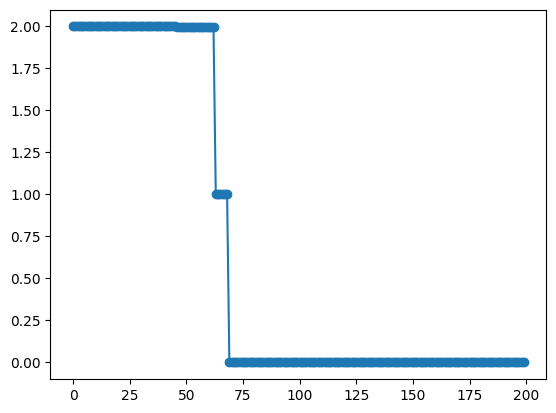

In [61]:
import matplotlib as mpl
from matplotlib import pyplot as plt

plt.plot(sorted(P_evals)[::-1][0:200], marker='o')
operator = k

C = cp.deepcopy(Cact_loc)
k1 = C.T @ operator @ C

# Graph Clustering

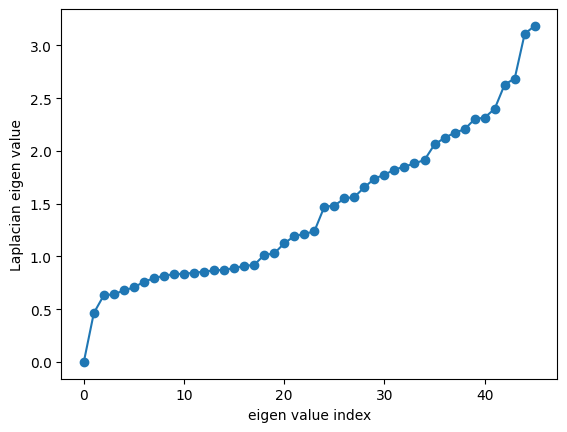

In [64]:
import copy as cp

nvecs = 2

A = abs(k1)
L = -1*A
for i in range(A.shape[0]):
    L[i,i] += np.sum(A[i,:])
    
L_evals, L_evecs = sp.linalg.eigh(L)
# print(L_evals)
plt.plot(L_evals,marker='o');
plt.xlabel("eigen value index");
plt.ylabel("Laplacian eigen value");

# L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
# F = eigen(L);


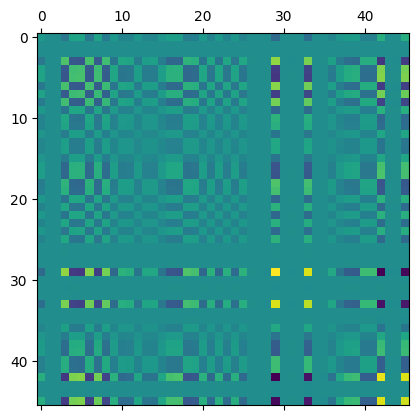

In [65]:
# projection onto the lowest `nvecs` fiedler vectors

L_evecs_ss = L_evecs[:,0:nvecs]
graph = L_evecs_ss @ L_evecs_ss.T
plt.matshow(graph);

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=nvecs, random_state=0).fit(graph)
# kmeans.labels_array([1, 1, 1, 0, 0, 0], dtype=int32)

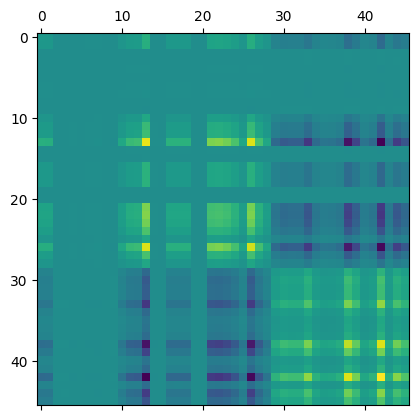

In [67]:
kmeans.labels_
sorted_list = np.argsort(kmeans.labels_)
plt.matshow(graph[sorted_list, :][:, sorted_list]);

In [68]:
C_sorted = Cact_loc[:,sorted_list]
pyscf.tools.molden.from_mo(pymol, "C_act_loc_sorted.molden", C_sorted)

In [ ]:
# Now let's break up that first large cluster on the metal

m = C_sorted[:,24:34].T @ operator @ C_sorted[:,24:34]
m_evals, m_evecs = sp.linalg.eigh(m)

m_evecs = m_evecs[:, [0,9,1,2,3,4,5,6,7,8]] # put 4s sig,sig* first
C_sorted_2 = cp.deepcopy(C_sorted)
C_sorted_2[:,24:34] = C_sorted[:,24:34] @ m_evecs
pyscf.tools.molden.from_mo(pymol, "C_act_loc_sorted_2.molden", C_sorted_2)

# sorted_list_2 = [*range(34)]
# sorted_list_2[4] = -1
# sorted_list_2[5] = -2


# sorted_list_2 = np.argsort(sorted_list_2)

# C_sorted_3 = C_sorted_2[:, sorted_list_2]
# pyscf.tools.molden.from_mo(pymol, "C_act_loc_sorted_3.molden", C_sorted_3)

clusters = [
            [*range(0,6)],
            [*range(6,12)],
            [*range(12,18)],
            [*range(18,24)],
            [*range(24,32)],
            [*range(32,34)]
           ]
init_fspace = [
    (3,3),
    (3,3),
    (3,3),
    (3,3),
    (1,1),
    (4,4)
];



WARN: orbitals [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] not symmetrized, norm = [0.50000006 0.50000003 0.5        0.5000001  0.50000005 0.5
 0.50000003 0.50000002 0.50000007 0.50000001 0.5        0.50000007
 0.50000007 0.50000003 0.50000007 0.50000002 0.50000001 0.5
 0.50000005 0.50000003 0.5000001  0.5        0.5        0.50000006]



In [121]:
print(clusters)
print(init_fspace)

[[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11], [12, 13, 14, 15, 16, 17], [18, 19, 20, 21, 22, 23], [24, 25, 26, 27, 28, 29, 30, 31], [32, 33]]
[(3, 3), (3, 3), (3, 3), (3, 3), (1, 1), (4, 4)]


# Make Integrals

In [122]:
d1_embed = 2 * Cdoc @ Cdoc.T

h0 = pyscf.gto.mole.energy_nuc(pymol)
h  = pyscf.scf.hf.get_hcore(pymol)
j, k = pyscf.scf.hf.get_jk(pymol, d1_embed, hermi=1)

In [123]:
h0 += np.trace(d1_embed @ ( h + .5*j - .25*k))

h = C_sorted_2.T @ h @ C_sorted_2
j = C_sorted_2.T @ j @ C_sorted_2;
k = C_sorted_2.T @ k @ C_sorted_2;

In [124]:
nact = h.shape[0]

h2 = pyscf.ao2mo.kernel(pymol, C_sorted_2, aosym="s4", compact=False)
h2.shape = (nact, nact, nact, nact)

In [125]:
# The use of d1_embed only really makes sense if it has zero electrons in the
# active space. Let's warn the user if that's not true

S = pymol.intor("int1e_ovlp_sph")
n_act = np.trace(S @ d1_embed @ S @ C_sorted_2 @ C_sorted_2.T)
if abs(n_act) > 1e-8 == False:
    print(n_act)
    error(" I found embedded electrons in the active space?!")

h1 = h + j - .5*k;


In [126]:
np.save("clustered1_integrals_h0", h0)
np.save("clustered1_integrals_h1", h1)
np.save("clustered1_integrals_h2", h2)
np.save("clustered1_mo_coeffs", C_sorted_2)
np.save("clustered1_overlap_mat", S)